# EXPLORING SCIKIT-LERAN DATASETS
Datasets that are included in scikit-learn are usually stored as Bunch objects, which contain some information about the dataset as well as the actual data. All you need to know about Bunch objects is that they behave like dictionaries, with the added benefit that you can access values using a dot (as in bunch.key instead of bunch['key']).
***

Import the required libraries for computing the KNN Algorithm.

In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

## Dataset: Wisconsin Breast Cancer
We will complement the small synthetic datasets with two real-world datasets that are included in scikit-learn. One is the Wisconsin Breast Cancer dataset (cancer, for short), which records clinical measurements of breast cancer tumors. Each tumor is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors), and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


The dataset consists of 569 data points, with 30 features each.

In [3]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


Of these 569 data points, 212 are labeled as malignant and 357 as benign.

In [4]:
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


To get a description of the semantic meaning of each feature, we can have a look at the feature_names attribute.

In [5]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
print("Description of the data:\n{}".format(cancer.DESCR))

Description of the data:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, 

Here, we added three new data points, shown as stars. For each of them, we marked the closest point in the training set. The prediction of the one-nearest-neighbor algorithm is the label of that point (shown by the color of the cross).

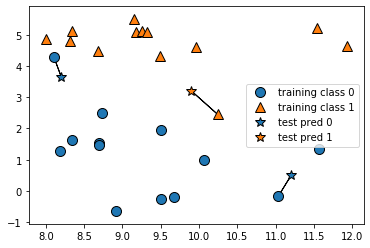

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Split the data into a training and a test set so we can evaluate generalization performance.

In [8]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Import and instantiate the class. This is when we can set parameters, like the number of neighbors to use. 

In [9]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Fit the classifier using the training set. For KNeighborsClassifier this means storing the dataset, so we can compute neighbors during prediction.

In [10]:
clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


To evaluate how well our model generalizes, we can call the score method with the test data together with the test labels.

In [11]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


Decision boundaries created by the nearest neighbors model for different values of n_neighbors.

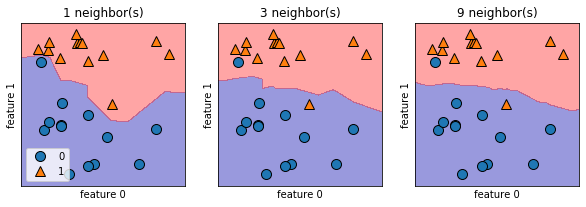

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):

    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)

Evaluate training and test set performance, and also calculate the error with different numbers of neighbors. 

In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
error_rate = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 40)
for n_neighbors in neighbors_settings:

    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))

    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

    # record the error rate
    pred = clf.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

Plot the training and test accuracy from range 1 to 40.

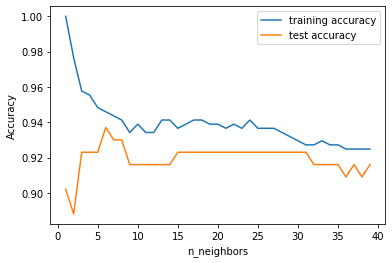

In [14]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Plot the error rate from range 1 to 40

Text(0, 0.5, 'Error Rate')

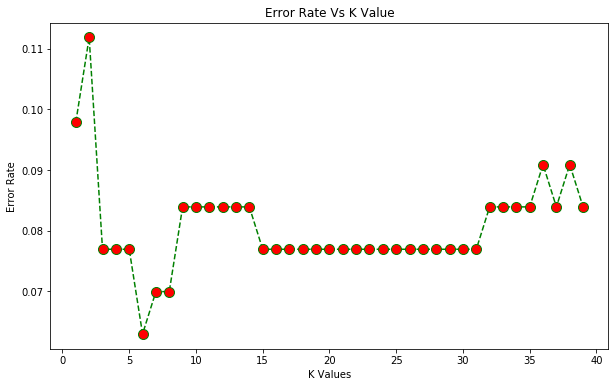

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color='green', linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel("K Values")
plt.ylabel("Error Rate")

Create the confusion matrix and report which shows precision, recall, f1-score and support of the classification.

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

print("KNN Confusion Matrix:")
print(confusion_matrix(y_test,pred))
print("\n\nClassification Report:")
print(classification_report(y_test,pred))

KNN Confusion Matrix:
[[45  8]
 [ 4 86]]


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        53
           1       0.91      0.96      0.93        90

    accuracy                           0.92       143
   macro avg       0.92      0.90      0.91       143
weighted avg       0.92      0.92      0.92       143



## Conclusion
Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle, using around six neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.

Submitted By: Sahajkumar Lad

PRN: 19030142027